# Author: **Dalbhanjan Singh**

# Task 1 Simple Linear Regression

## Performing Linear Regression Using Scikit Learn Library
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables

Required Libraries

pandas     - Used to handle dataframe

numpy      - Used to handle arrays

matplotlib - used to plot graph

plotly express - to visualize the data

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#read csv file using pandas
df1 = pd.read_csv("/content/Linear.csv")

In [ ]:
df1.sort_values(['Hours'],inplace=True)

In [ ]:
df1.head()

,Hours,Scores
14,1.1,17
5,1.5,20
17,1.9,24
0,2.5,21
16,2.5,30


In [ ]:
df1.head()

,Hours,Scores
14,1.1,17
5,1.5,20
17,1.9,24
0,2.5,21
16,2.5,30


In [ ]:
# min_max_scalar is used to standardized the values 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# in this line of code we standardize the value of x
x=scaler.fit_transform(df1[['Hours']])

In [ ]:
y=df1.Scores

In [ ]:
# train_test_split, it is used to separate the dataset into two parts train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1[['Hours']], y,test_size=0.3, random_state=0)

In [ ]:
#importing linear regression model
from sklearn.linear_model import LinearRegression

In [ ]:
# creating a object of linear regression
lr = LinearRegression()

In [ ]:
# in this line of code we train our data using linear regression model
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# through score function we determine the accuracy of our model
lr.score(X_test,y_test)

0.9318830579679787

In [ ]:
# through predict function we find the dependent value using independent value
y_pred = lr.predict(X_test)


In [ ]:
lr.predict([[9.25]])

array([94.18225483])

Text(0.5, 1.0, 'Hours vs Scores')

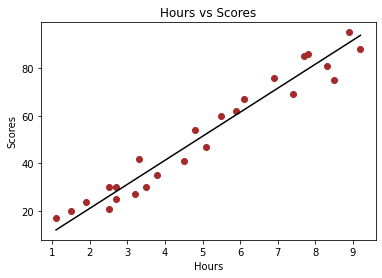

In [ ]:
# in below scatter plot we draw a predicted line
plt.scatter(df1.Hours,df1.Scores,c="brown")
plt.plot(df1.Hours,lr.predict(df1[['Hours']]),color='black')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")

we know,
        
        y = m*x + c

y = dependent variable 

x = independent variable

m = slope of line 

c = intercept of line
      

In [ ]:
# this is slope of line
lr.coef_

array([10.07046359])

In [ ]:
# this is intercept of line
lr.intercept_

1.0304666311813904

#Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
#Accuracy Measures
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.59007870123945
Mean Squared Error: 38.24340564210293
Root Mean Squared Error: 6.184125293208647


In [ ]:
yhat =y_pred
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)
# 0.877643371323 0.863248473832

0.9409250011398376 0.9383565229285261
